In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data_marketing.csv')
data.head()

/Users/keijiarostegui/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [5]:
data = pd.read_csv('data_marketing.csv', skiprows=2)
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
data.shape

(45211, 19)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [9]:
data.drop('customerid', axis=1, inplace=True)

In [11]:
data['job'] = data['jobedu'].apply(lambda x: x.split(',')[0])
data['education'] = data['jobedu'].apply(lambda x: x.split(',')[1])

In [12]:
data.drop('jobedu', axis=1, inplace=True)

In [13]:
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


# Missing values

There are mainly 3 types of missing values:

1. MCAR (Missing Completely At Random): There values do not depend on any other features.
2. MAR (Missing At Random): These values may be dependent on some other features.
3. MNAR (Missing Not At Random): These missing values have some reason for why they are missing.

In [16]:
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [18]:
data = data[~data.age.isnull()].copy()
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [21]:
# Finding the mode of month in data
month_mode = data.month.mode()[0]

# Filling the missing values with mode value of month in data
data.month.fillna(month_mode, inplace=True)

data.month.isnull().sum()

0

In [22]:
data = data[~data.response.isnull()].copy()
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

# Handling Outliers

There are two types of outliers:

1. Univariate outliers: Univariate outliers are the data points whose values lie bevond the range of expected values based on one variable.

2. Multivariate outliers: While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value.

## Univariable Analysis

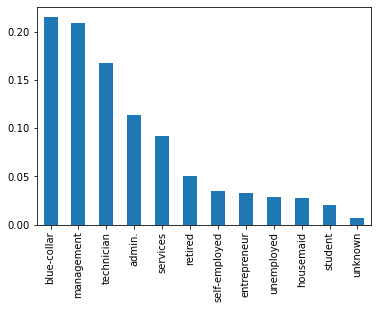

In [30]:
data.job.value_counts(normalize=True).plot.bar()
plt.show()

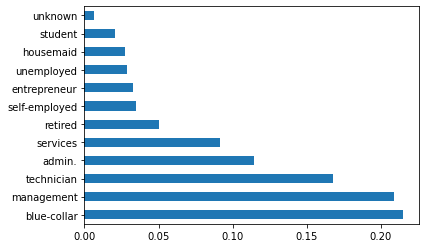

In [26]:
data.job.value_counts(normalize=True).plot.barh()
plt.show()

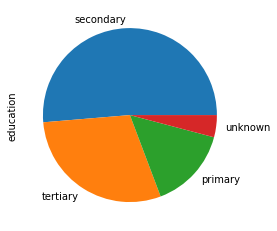

In [37]:
data.education.value_counts(normalize=True)

data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [38]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## Bivariable Analysis

1. Numeric Variables

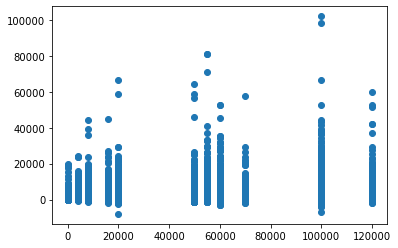

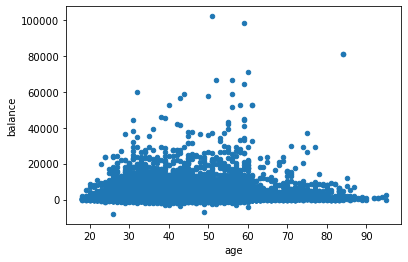

In [40]:
plt.scatter(data.salary, data.balance)
plt.show()

data.plot.scatter(x='age', y='balance')
plt.show()